<h2>Image recognition model using deep learning (CNN) with the help of Tensoflow and Open CV</h2>

This Notebook applies Deep learning by using the CNN (Convolutional Neural Network) to classify Ecommerce product. this model will be trained on the following Ecommerce product:
<hr/>
1. Sofa <br/>
2. TV Set <br/>
3. T-Shirt <br/>
4. Jeans

In [351]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as timage

In [352]:
channels = 1
path = r'C:\Users\Emack\Desktop\Python\AI\Image Recognition\ecommerce products\training'

In [353]:
## loading the image from the public dir
image = {}
for char in os.listdir(path):
    image[char] = len(os.listdir(os.path.join(path,char)))

In [354]:
image

{'jeans': 164, 'sofa': 199, 'tshirt': 150, 'tv': 160}

In [355]:
product = list(image.keys())
product

['jeans', 'sofa', 'tshirt', 'tv']

###### Simple plot of our data

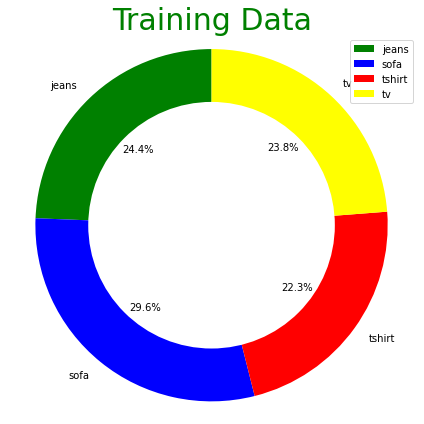

In [356]:

#colors
colors = ['green','blue','red','yellow']
plt.figure(figsize=(6,6))
plt.pie(list(image.values()), colors = colors, labels=product, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gcf()
plt.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title("Training Data", fontsize=30, color="green")
plt.legend()
plt.tight_layout()
plt.show()

## Preprocessing image data with the help of open cv

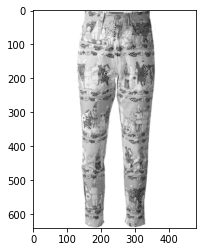

In [357]:
for category in product:
    file= os.path.join(path,category)
    for img in os.listdir(file):
        img_array=cv.imread(os.path.join(file,img), cv.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [358]:
img_array

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

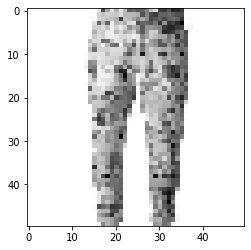

In [359]:
IMG_SIZE = 50
new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

###### Creating a Training data set

In [360]:
training_data = []
def create_training_data():
    for category in product:
        file= os.path.join(path,category)
        class_num =product.index(category)
        for img in os.listdir(file):
            try:
                img_array=cv.imread(os.path.join(file,img), cv.IMREAD_GRAYSCALE)
                new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num]) 
            except Exception as e:
                pass

In [361]:
create_training_data()

In [362]:
print(len(training_data))

673


In [363]:
import random
random.shuffle(training_data)

In [364]:
for sample in training_data:
    print(sample[1])

2
0
2
0
0
0
0
1
0
3
1
1
0
1
0
0
3
0
2
3
3
3
1
2
0
1
3
1
2
0
2
2
2
3
1
3
1
2
3
1
3
0
0
0
3
1
2
2
1
2
0
3
0
0
2
3
0
0
3
2
0
1
0
2
1
3
3
1
3
1
2
2
3
1
1
3
3
1
2
1
0
0
2
2
0
1
2
0
0
1
1
3
3
1
1
3
0
2
2
2
0
2
2
2
2
3
1
1
3
2
1
3
1
1
3
2
3
1
3
2
1
2
1
1
3
0
3
0
1
3
1
0
2
0
1
3
1
0
1
3
3
0
1
1
1
1
3
0
0
2
3
2
3
1
3
2
3
1
0
0
0
1
2
1
3
0
3
0
0
1
0
0
1
1
2
0
1
3
0
1
1
0
1
0
0
1
0
2
0
1
2
1
3
0
1
3
0
0
0
2
1
1
1
0
0
3
1
1
3
0
3
2
0
3
1
2
1
3
1
2
1
1
1
1
1
2
1
0
3
1
3
1
0
2
1
1
1
2
0
3
0
0
0
1
1
0
2
1
2
0
3
1
2
2
1
1
2
3
0
1
2
0
0
0
0
2
3
1
0
1
1
2
1
1
1
3
2
3
3
3
0
1
0
3
0
2
0
0
3
1
2
1
0
3
3
0
0
2
2
3
3
3
2
2
3
0
1
2
1
3
1
3
1
2
0
1
2
3
2
0
1
2
3
1
2
1
1
0
1
2
1
3
2
0
3
1
2
0
2
3
2
2
2
0
3
3
3
2
1
3
2
1
1
3
2
2
1
3
2
0
1
3
2
0
1
1
0
1
1
2
3
2
0
0
1
0
1
1
3
2
0
1
1
1
2
1
2
0
0
2
2
3
2
3
1
0
0
1
3
0
1
3
2
1
2
3
1
1
3
2
1
0
1
3
3
0
1
1
2
1
0
3
3
0
0
0
2
2
2
3
2
3
0
0
2
3
2
3
3
2
0
1
0
3
2
2
3
1
0
0
0
2
0
1
2
3
0
0
1
0
1
0
2
0
1
3
3
1
3
3
0
1
1
3
0
2
3
0
1
1
3
0
2
1
2
0
2
1
3
0
0
2
2
1
0
1
1
2
2
0


In [365]:
X = []
y = []

In [366]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [367]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)

In [368]:
X =X/255

In [369]:
len(X)

673

In [370]:

X.shape[1:]

(50, 50, 1)

#### Building our model

In [371]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=X.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))),

model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))),


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = 'softmax'))


In [372]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=1)

In [ ]:
model.fit(X,y, batch_size=8, epochs=10, validation_split=0.3, callbacks=[early_stopping])

Epoch 1/10
59/59 [==============================] - 5s 79ms/step - loss: 0.9800 - accuracy: 0.6327 - val_loss: 0.6598 - val_accuracy: 0.7673
Epoch 2/10
59/59 [==============================] - 4s 72ms/step - loss: 0.2955 - accuracy: 0.8917 - val_loss: 0.3196 - val_accuracy: 0.9257
Epoch 3/10
59/59 [==============================] - 4s 71ms/step - loss: 0.1995 - accuracy: 0.9448 - val_loss: 0.2779 - val_accuracy: 0.9307
Epoch 4/10
59/59 [==============================] - 4s 71ms/step - loss: 0.1253 - accuracy: 0.9703 - val_loss: 0.4345 - val_accuracy: 0.8911


### Testing our model

In [ ]:
test_img1 =timage.load_img(r'C:\Users\Emack\Desktop\Python\AI\Image Recognition\ecommerce products\test\1.jpg')

In [ ]:
test_img1

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_path = r'C:\Users\Emack\Desktop\Python\AI\Image Recognition\ecommerce products\test'

for i in os.listdir(test_path):
    test_img = cv.imread(test_path+'//'+i, cv.IMREAD_GRAYSCALE)
    plt.imshow(test_img)
    plt.show()
  


    x_test_resize = cv.resize(test_img, (IMG_SIZE, IMG_SIZE))
    x_test = np.array(x_test_resize).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
    val = model.predict([x_test])
    if np.argmax(val) == 0:
        print('A Jeans')
    if np.argmax(val)==1:
        print('A Sofa')
    if np.argmax(val)==2:
        print("A T-Shirt")
    if np.argmax(val)==3:
        print('A TV set')
        


In [ ]:
if os.path.isfile('Ecom_pro_clas.h5') is False:
    model.save('Ecom_pro_clas.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
loaded_model = load_model('Ecom_pro_clas.h5')

In [ ]:
model.summary()

In [ ]:
loaded_model.summary()